In [459]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import random

In [460]:
# Buscar o dataset
raw_dataset = fetch_ucirepo(id=45)

# Extrair os valores dos dados corretamente
data_values = raw_dataset.data['features']
target_values = raw_dataset.data['targets']
#target_values
# Criar um DataFrame com os dados principais
dataset = pd.DataFrame(data_values)


In [461]:
# Buscar o dataset
raw_dataset = fetch_ucirepo(id=45)

# Extrair os valores dos dados corretamente
data_values = raw_dataset.data['features']
target_values = raw_dataset.data['targets']

# Criar um DataFrame com os dados principais
dataset = pd.DataFrame(data_values)

# Adicionar a coluna 'NUM' ao DataFrame principal
dataset['NUM'] = target_values

# Nomes que serão dados as colunas na mesma ordem em que aparecem
heart_disease_cols = [ 'Idade',
 'Sexo',
 'Dor_Peito',
 'PA_rep',
 'Col_Serico', 
 'ASJ',
 'ECG_rep',
 'MFC',
 'AINEX',
 'DEPSTEX',
 'INCLI',
 'CA',
 'TAL',
 'NUM']

# Renomear as colunas do DataFrame
dataset.columns = heart_disease_cols

dataset['NUM'] = dataset['NUM'].replace({2: 1})
dataset['NUM'] = dataset['NUM'].replace({3: 1})
dataset['NUM'] = dataset['NUM'].replace({4: 1})

# Exibir as primeiras linhas do DataFrame
lin = dataset.loc[155]
print('Linha 155:\n', lin)


Linha 155:
 Idade          70.0
Sexo            1.0
Dor_Peito       4.0
PA_rep        130.0
Col_Serico    322.0
ASJ             0.0
ECG_rep         2.0
MFC           109.0
AINEX           0.0
DEPSTEX         2.4
INCLI           2.0
CA              3.0
TAL             3.0
NUM             1.0
Name: 155, dtype: float64


In [462]:
df_sex = dataset.groupby(['Sexo', 'NUM']).size()
df_sex

Sexo  NUM
0     0       72
      1       25
1     0       92
      1      114
dtype: int64

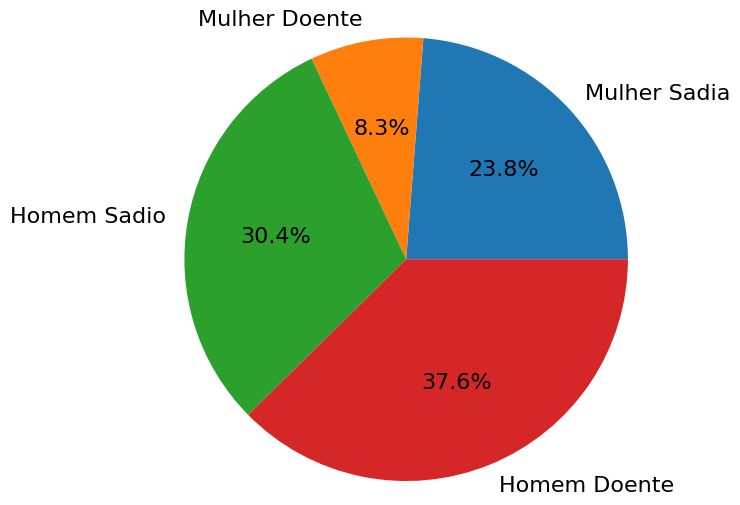

In [463]:
plt.pie(df_sex, labels = ['Mulher Sadia','Mulher Doente','Homem Sadio','Homem Doente'], autopct="%1.1f%%", radius = 1.5, textprops = {'fontsize': 16})
plt.show()

In [464]:
X = dataset.drop('NUM', axis=1).copy()
y = dataset['NUM'].copy()

In [465]:
X.head()

,Idade,Sexo,Dor_Peito,PA_rep,Col_Serico,ASJ,ECG_rep,MFC,AINEX,DEPSTEX,INCLI,CA,TAL
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [466]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: NUM, dtype: int64

In [467]:
Xcod = pd.get_dummies(X, columns=['Sexo', 'Dor_Peito', 'ASJ', 'ECG_rep', 'AINEX', 'INCLI', 'CA', 'TAL'])
Xcod.head()

,Idade,PA_rep,Col_Serico,MFC,DEPSTEX,Sexo_0,Sexo_1,Dor_Peito_1,Dor_Peito_2,Dor_Peito_3,...,INCLI_1,INCLI_2,INCLI_3,CA_0.0,CA_1.0,CA_2.0,CA_3.0,TAL_3.0,TAL_6.0,TAL_7.0
0,63,145,233,150,2.3,False,True,True,False,False,...,False,False,True,True,False,False,False,False,True,False
1,67,160,286,108,1.5,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,67,120,229,129,2.6,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,37,130,250,187,3.5,False,True,False,False,True,...,False,False,True,True,False,False,False,True,False,False
4,41,130,204,172,1.4,True,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False


In [468]:
X_treino, X_teste, y_treino, y_teste = train_test_split(Xcod, y, test_size=0.15, stratify = y, random_state=42)
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(257, 28) (46, 28) (257,) (46,)


In [469]:
X_treino_norm = scale(X_treino)
X_teste_norm = scale(X_teste)

X_teste.head()

,Idade,PA_rep,Col_Serico,MFC,DEPSTEX,Sexo_0,Sexo_1,Dor_Peito_1,Dor_Peito_2,Dor_Peito_3,...,INCLI_1,INCLI_2,INCLI_3,CA_0.0,CA_1.0,CA_2.0,CA_3.0,TAL_3.0,TAL_6.0,TAL_7.0
155,70,130,322,109,2.4,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
162,54,110,214,158,1.6,True,False,False,False,True,...,False,True,False,True,False,False,False,True,False,False
233,74,120,269,121,0.2,True,False,False,True,False,...,True,False,False,False,True,False,False,True,False,False
277,39,138,220,152,0.0,True,False,False,False,True,...,False,True,False,True,False,False,False,True,False,False
212,41,130,214,168,2.0,False,True,False,False,True,...,False,True,False,True,False,False,False,True,False,False


In [470]:
X_treino_norm

array([[-0.06010548, -1.32853876,  0.33466249, ...,  0.90702538,
        -0.23082177, -0.81121176],
       [-1.06027796, -0.18508778,  1.11448087, ...,  0.90702538,
        -0.23082177, -0.81121176],
       [ 0.27328535, -0.18508778,  1.01938107, ...,  0.90702538,
        -0.23082177, -0.81121176],
       ...,
       [-0.06010548,  3.47395534,  0.63898186, ..., -1.10250498,
        -0.23082177,  1.23272375],
       [-0.3934963 ,  0.5009828 ,  0.92428127, ..., -1.10250498,
        -0.23082177,  1.23272375],
       [ 1.71797892,  0.78684555, -1.43419383, ..., -1.10250498,
        -0.23082177,  1.23272375]])

In [471]:
X_teste_norm

array([[ 1.76426793, -0.23693871,  2.08295804, ...,  0.91651514,
        -0.34921515, -0.69560834],
       [ 0.01426632, -1.36056559, -0.40397672, ...,  0.91651514,
        -0.34921515, -0.69560834],
       [ 2.20176834, -0.79875215,  0.86251783, ...,  0.91651514,
        -0.34921515, -0.69560834],
       ...,
       [ 0.01426632, -0.79875215, -1.00268324, ..., -1.09108945,
        -0.34921515,  1.43759058],
       [ 0.77989202,  0.32487473, -0.56516694, ..., -1.09108945,
        -0.34921515,  1.43759058],
       [-0.20448388,  0.21251204, -0.19673216, ...,  0.91651514,
        -0.34921515, -0.69560834]])

In [472]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# Implementação Perceptron
class Perceptron:
    ## Primeira função de uma classe (método construtor de objetos)
    ## self é um parâmetro obrigatório que receberá a instância criada
    def __init__(self, amostras, saidas, taxa_aprendizado=0.1, epocas=1000, limiar=1):
        self.amostras = [amostra[:] for amostra in amostras]  # Fazendo uma cópia das amostras
        self.saidas = saidas
        self.taxa_aprendizado = taxa_aprendizado
        self.epocas = epocas
        self.limiar = limiar
        self.n_amostras = len(amostras) # número de linhas (amostras)
        self.n_atributos = len(amostras[0]) # número de atributos
        self.pesos = []

    ## Atribuição de treinamento para amostras e construção da matriz 
    def treinar(self):
        # Inserir o valor do limiar na posição "0" para cada amostra da lista “amostra” Ex.: [[0.72, 0.82], ...] vira [[1, 0.72, 0.82]
        for amostra in self.amostras:
            amostra.insert(0, self.limiar)

        # Gerar valores randômicos entre 0 e 1 (pesos) conforme o número de atributos
        for i in range(self.n_atributos):
            self.pesos.append(random.random())
            # Inserir o valor do limiar na posição "0" do vetor de pesos
            self.pesos.insert(0, self.limiar)
            
        # Inicializar contador de épocas
        n_epocas = 0

        while True:
            # Inicializar variável erro
            # (quando terminar loop e erro continuar False, é porque não tem mais diferença entre valor calculado e desejado
            erro = False

            # Gerar valores randômicos entre 0 e 1 (pesos) conforme o número de atributos
            for i in range(self.n_amostras):
                # Inicializar potencial de ativação
                u = 0
                # Para cada atributo...
                for j in range(self.n_atributos + 1):
                    # Multiplicar amostra e seu peso e também somar com o potencial
                    u += self.pesos[j] * self.amostras[i][j]
                # Obter a saída da rede considerando g a função sinal
                y = self.sinal(u)

                # Verificar se a saída da rede é diferente da saída desejada
                if y != self.saidas[i]:
                    # Calcular o erro
                    erro_aux = self.saidas[i] - y
                    
                    # Fazer o ajuste dos pesos para cada elemento da amostra
                    for j in range(self.n_atributos + 1):
                        self.pesos[j] = self.pesos[j] + self.taxa_aprendizado * erro_aux * self.amostras[i][j]
                        
                    # Atualizar variável erro, já que erro é diferente de zero (e
                    erro = True
                    
            # Atualizar contador de épocas
            n_epocas += 1
            # Critérios de parada do loop: erro inexistente ou o número de épocas
            if not erro or n_epocas >= self.epocas:
                break
                
    ## Testes para "novas" amostras
    def teste(self, amostra):
        # Inserir o valor do limiar na posição "0" para cada amostra da lista “amostra”
        amostra.insert(0, self.limiar)
        
        # Inicializar potencial de ativação
        u = 0
        
        # Para cada atributo...
        for i in range(self.n_atributos + 1):
            # Multiplicar amostra e seu peso e também somar com o potencial que já tinha
            u += self.pesos[i] * amostra[i]
        # Obter a saída da rede considerando g a função sinal
        y = self.sinal(u)
        print('Classe: %d' % y)

    ## Função sinal
    def sinal(self, u):
        if u >= 0:
            return 1
        return -1

In [473]:
# Amostras (entrada e saída) para treinamento
amostras = X_treino_norm.tolist()

saidas = y_treino.tolist()

# Chamar classe e fazer treinamento das amostras
rede = Perceptron(amostras, saidas)
rede.treinar()


IndexError: list index out of range